# Imports and Data Frame Creation

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
import seaborn as sns


In [2]:
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/diabetic-data-cleaning.zip', compression='zip')

# '?' Entered into Data

In [3]:
for col in df.describe().columns:
    nanidx = df[col].sample(frac=np.random.uniform(0.0, 0.001)).index
    df.loc[nanidx, col] = '?'

# Understanding the Data

In [4]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
df.describe()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,101677,71481,6,3,10,10,9,27,18,15,...,1,4,4,2,2,2,2,2,2,3
top,?,?,Caucasian,Female,[70-80),?,1,1,7,3,...,No,No,No,No,No,No,No,No,Yes,NO
freq,90,68,76099,54708,26068,98569,53985,60203,57467,17742,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null object
patient_nbr                 101766 non-null object
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null object
discharge_disposition_id    101766 non-null object
admission_source_id         101766 non-null object
time_in_hospital            101766 non-null object
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null object
num_procedures              101766 non-null object
num_medications             101766 non-null object
number_outpatient           101766 non-null object
number_emergency            101766 non-null object
number_inpatient      

In [7]:
df.weight.value_counts()

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

In [8]:
for col in list(df.columns):
    print(df.loc[df[col] == '?'])

       encounter_id patient_nbr             race  gender       age weight  \
2990              ?      546156  AfricanAmerican  Female   [50-60)      ?   
3112              ?   115042869        Caucasian    Male   [60-70)      ?   
4867              ?      978714  AfricanAmerican    Male   [70-80)      ?   
5225              ?     6767289  AfricanAmerican  Female   [60-70)      ?   
5532              ?    73167606  AfricanAmerican  Female   [70-80)      ?   
7753              ?      738342  AfricanAmerican    Male   [20-30)      ?   
11605             ?    55173222  AfricanAmerican    Male   [60-70)      ?   
12508             ?     3771855        Caucasian  Female   [40-50)      ?   
15040             ?    23505282        Caucasian    Male   [60-70)      ?   
15273             ?     9090099        Caucasian  Female   [30-40)      ?   
15721             ?    30673800        Caucasian  Female   [80-90)      ?   
16195             ?     9055314        Caucasian  Female   [70-80)      ?   

       encounter_id patient_nbr             race  gender       age weight  \
0           2278392     8222157        Caucasian  Female    [0-10)      ?   
1            149190    55629189        Caucasian  Female   [10-20)      ?   
2             64410    86047875  AfricanAmerican  Female   [20-30)      ?   
3            500364    82442376        Caucasian    Male   [30-40)      ?   
4             16680    42519267        Caucasian    Male   [40-50)      ?   
5             35754    82637451        Caucasian    Male   [50-60)      ?   
6             55842    84259809        Caucasian    Male   [60-70)      ?   
7             63768   114882984        Caucasian    Male   [70-80)      ?   
8             12522    48330783        Caucasian  Female   [80-90)      ?   
9             15738    63555939        Caucasian  Female  [90-100)      ?   
10            28236    89869032  AfricanAmerican  Female   [40-50)      ?   
11            36900    77391171  AfricanAmerican    Male   [60-70)      ?   

      encounter_id patient_nbr             race  gender      age weight  \
5166      27452700      193815        Caucasian  Female  [70-80)      ?   
25519     85153908     4472145        Caucasian  Female  [80-90)      ?   
32559    103660848     3050865  AfricanAmerican  Female  [70-80)      ?   
35491    109956090    46473885        Caucasian    Male  [70-80)      ?   
45467    140544210    38228931        Caucasian  Female  [50-60)      ?   
55455    160329330    33906141        Caucasian  Female  [80-90)      ?   
81212    251198472    39993147        Caucasian    Male  [70-80)      ?   
82638    257663952    90771876  AfricanAmerican    Male  [40-50)      ?   
84348    265642278   111090681        Caucasian  Female  [50-60)      ?   
85091    269165544    60265161        Caucasian  Female  [80-90)      ?   

      admission_type_id discharge_disposition_id admission_source_id  \
5166                  ?                        6                   4   
25519                 ?       

       encounter_id patient_nbr             race  gender       age weight  \
1            149190    55629189        Caucasian  Female   [10-20)      ?   
2             64410    86047875  AfricanAmerican  Female   [20-30)      ?   
3            500364    82442376        Caucasian    Male   [30-40)      ?   
4             16680    42519267        Caucasian    Male   [40-50)      ?   
5             35754    82637451        Caucasian    Male   [50-60)      ?   
6             55842    84259809        Caucasian    Male   [60-70)      ?   
7             63768   114882984        Caucasian    Male   [70-80)      ?   
8             12522    48330783        Caucasian  Female   [80-90)      ?   
10            28236    89869032  AfricanAmerican  Female   [40-50)      ?   
11            36900    77391171  AfricanAmerican    Male   [60-70)      ?   
14            62256    49726791  AfricanAmerican  Female   [60-70)      ?   
15            73578    86328819  AfricanAmerican    Male   [60-70)      ?   

       encounter_id patient_nbr             race  gender       age weight  \
1082        7980534    73556406        Caucasian  Female   [60-70)      ?   
3558       21873612     8673813        Caucasian    Male   [70-80)      ?   
4467       25162200    18112419        Caucasian  Female   [70-80)      ?   
4471       25182996    16296615            Other    Male   [60-70)      ?   
5495       28470948    16516467  AfricanAmerican  Female   [80-90)      ?   
8173       37400838     9639468        Caucasian    Male   [40-50)      ?   
8521       38440002    23513400        Caucasian    Male   [40-50)      ?   
9435       41154780    47908908        Caucasian  Female   [70-80)      ?   
10836      45515664     3779973        Caucasian  Female   [70-80)      ?   
11049      46158792        6174        Caucasian  Female   [80-90)      ?   
11741      48352344     3783204        Caucasian    Male   [70-80)      ?   
14198      55619046      514467        Caucasian  Female   [70-80)      ?   

Empty DataFrame
Columns: [encounter_id, patient_nbr, race, gender, age, weight, admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, payer_code, medical_specialty, num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency, number_inpatient, diag_1, diag_2, diag_3, number_diagnoses, max_glu_serum, A1Cresult, metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, citoglipton, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, metformin-pioglitazone, change, diabetesMed, readmitted]
Index: []

[0 rows x 50 columns]
Empty DataFrame
Columns: [encounter_id, patient_nbr, race, gender, age, weight, admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, payer_code, medical_specialty, num_lab_procedures, num_proce

[0 rows x 50 columns]


In [9]:
list(df.columns)

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

# Replace '?' with NaN

In [10]:
df2 = df.replace('?', np.nan)

# Convert Objects to Floats

In [11]:
df2 = df2.astype({'time_in_hospital': 'float', 'num_lab_procedures': 'float', 'num_procedures': 'float',
                  'num_medications': 'float', 'number_outpatient': 'float', 'number_emergency': 'float',
                 'number_inpatient': 'float'}, copy = False)

In [12]:
df2.isnull().sum()*100/df2.isnull().count()

encounter_id                 0.088438
patient_nbr                  0.066820
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.009826
discharge_disposition_id     0.054046
admission_source_id          0.056993
time_in_hospital             0.075664
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.016705
num_procedures               0.022601
num_medications              0.000983
number_outpatient            0.092369
number_emergency             0.049132
number_inpatient             0.025549
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.081560
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

In [13]:
df2.weight.value_counts()

[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
Name: weight, dtype: int64

In [14]:
df2 = df2.drop(columns = ['weight', 'payer_code', 'medical_specialty', 'encounter_id', 'patient_nbr'])

In [15]:
df2.head(10)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,41.0,0.0,1.0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1.0,1.0,7.0,3.0,59.0,0.0,18.0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,2.0,11.0,5.0,13.0,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1.0,1.0,7.0,2.0,44.0,1.0,16.0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1.0,1.0,7.0,1.0,51.0,0.0,8.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Caucasian,Male,[50-60),2.0,1.0,2.0,3.0,31.0,6.0,16.0,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,Caucasian,Male,[60-70),3.0,1.0,2.0,4.0,70.0,1.0,21.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,Caucasian,Male,[70-80),1.0,1.0,7.0,5.0,73.0,0.0,12.0,...,No,No,No,No,No,No,No,No,Yes,>30
8,Caucasian,Female,[80-90),2.0,1.0,4.0,13.0,68.0,2.0,28.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,Caucasian,Female,[90-100),3.0,3.0,4.0,12.0,33.0,3.0,18.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [16]:
df3 = df2.loc[:,['time_in_hospital','num_lab_procedures','num_procedures', 'number_outpatient', 'number_emergency', 'number_inpatient']]


# Fill NaN with Column Mean

In [17]:
df3 = df2.fillna(df2.mean())
df3.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,41.0,0.0,1.0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1.0,1.0,7.0,3.0,59.0,0.0,18.0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,2.0,11.0,5.0,13.0,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1.0,1.0,7.0,2.0,44.0,1.0,16.0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1.0,1.0,7.0,1.0,51.0,0.0,8.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Visualizing Outliers

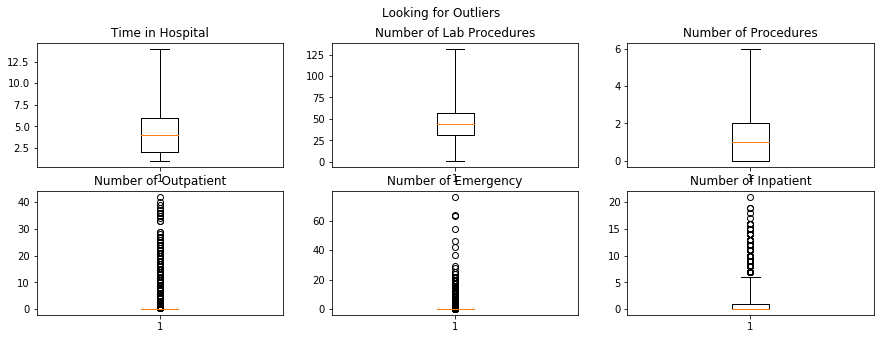

In [18]:
plt.figure(figsize = (15,5)) 

plt.subplot(2,3,1)
plt.boxplot(df3['time_in_hospital'], whis = 5)
plt.title('Time in Hospital')

plt.subplot(2,3,2)
plt.boxplot(df3['num_lab_procedures'], whis = 5)
plt.title('Number of Lab Procedures')

plt.subplot(2,3,3)
plt.boxplot(df3['num_procedures'], whis = 5)
plt.title('Number of Procedures')

plt.subplot(2,3,4)
plt.boxplot(df3['number_outpatient'], whis = 5)
plt.title('Number of Outpatient')

plt.subplot(2,3,5)
plt.boxplot(df3['number_emergency'], whis = 5)
plt.title('Number of Emergency')

plt.subplot(2,3,6)
plt.boxplot(df3['number_inpatient'], whis = 5)
plt.title('Number of Inpatient')

plt.suptitle('Looking for Outliers')
plt.show()

# Winsorizing Outliers

In [19]:
winsorized_number_outpatient = winsorize(df3['number_outpatient'], (0, .05))
winsorized_number_emergency = winsorize(df3['number_emergency'], (0, .05))
winsorized_number_inpatient = winsorize(df3['number_inpatient'], (0, .05))

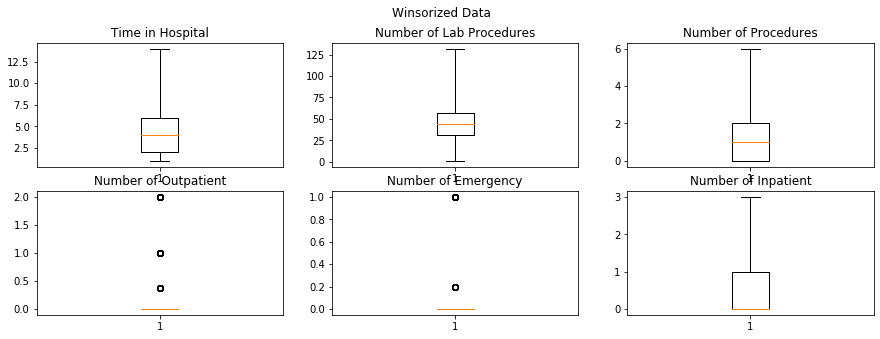

In [20]:
plt.figure(figsize = (15,5)) 

plt.subplot(2,3,1)
plt.boxplot(df3['time_in_hospital'], whis = 5)
plt.title('Time in Hospital')

plt.subplot(2,3,2)
plt.boxplot(df3['num_lab_procedures'], whis = 5)
plt.title('Number of Lab Procedures')

plt.subplot(2,3,3)
plt.boxplot(df3['num_procedures'], whis = 5)
plt.title('Number of Procedures')

plt.subplot(2,3,4)
plt.boxplot(winsorized_number_outpatient, whis = 5)
plt.title('Number of Outpatient')

plt.subplot(2,3,5)
plt.boxplot(winsorized_number_emergency, whis = 5)
plt.title('Number of Emergency')

plt.subplot(2,3,6)
plt.boxplot(winsorized_number_inpatient, whis = 5)
plt.title('Number of Inpatient')

plt.suptitle('Winsorized Data')
plt.show()

# Create df for numeric values

In [21]:
df_cat = df2.drop(columns = ['time_in_hospital','num_lab_procedures','num_procedures', 'number_outpatient', 'number_emergency', 'number_inpatient'])

In [22]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 39 columns):
race                        99493 non-null object
gender                      101766 non-null object
age                         101766 non-null object
admission_type_id           101756 non-null float64
discharge_disposition_id    101711 non-null float64
admission_source_id         101708 non-null float64
num_medications             101765 non-null float64
diag_1                      101745 non-null object
diag_2                      101408 non-null object
diag_3                      100343 non-null object
number_diagnoses            101683 non-null float64
max_glu_serum               101766 non-null object
A1Cresult                   101766 non-null object
metformin                   101766 non-null object
repaglinide                 101766 non-null object
nateglinide                 101766 non-null object
chlorpropamide              101766 non-null object
glimepiride       

In [23]:
for col in df_cat[df_cat.describe().columns]:
    mode = df_cat[col].mode()
    df_cat[col] = df_cat[col].fillna(mode)

In [24]:
df_cat.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,num_medications,diag_1,diag_2,diag_3,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,250.83,NaN,NaN,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1.0,1.0,7.0,18.0,276,250.01,255,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,13.0,648,250,V27,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1.0,1.0,7.0,16.0,8,250.43,403,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1.0,1.0,7.0,8.0,197,157,250,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Try using multiple methods on the same data. How do your results differ depending on the order you do them?

1) It makes sense to use mean for imputation of numeric values

2) Depending on the categorical values, we could use mode for imputation

3) Separate the data in multiple dataframes based on numberical and categorical data then use the appropriate method for cleaning the data and then imputating the cleaned data. Finally, we can concantenate the cleaned dataframes into one dataframe and perform the respective analysis.

## Create Binary Column for Readmission 

In [25]:
df_cat['readmitted_binary'] = df_cat['readmitted'].apply(lambda x: 0 if x=='NO' else 1)

In [26]:
df_cat.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,num_medications,diag_1,diag_2,diag_3,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_binary
0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,250.83,NaN,NaN,...,No,No,No,No,No,No,No,No,NO,0
1,Caucasian,Female,[10-20),1.0,1.0,7.0,18.0,276,250.01,255,...,Up,No,No,No,No,No,Ch,Yes,>30,1
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,13.0,648,250,V27,...,No,No,No,No,No,No,No,Yes,NO,0
3,Caucasian,Male,[30-40),1.0,1.0,7.0,16.0,8,250.43,403,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,Caucasian,Male,[40-50),1.0,1.0,7.0,8.0,197,157,250,...,Steady,No,No,No,No,No,Ch,Yes,NO,0


## Determine Relationship between Race and Readmission

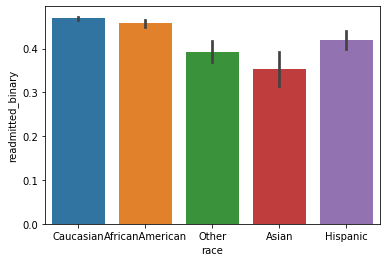

In [27]:
sns.barplot(x= 'race', y ='readmitted_binary', data = df_cat)

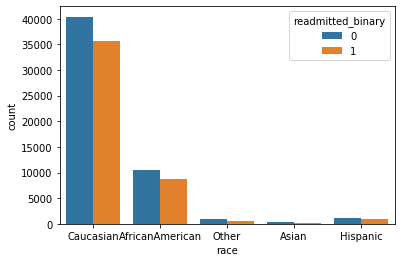

In [28]:
sns.countplot('race', hue = 'readmitted_binary', data = df_cat)

In [29]:
count_table = pd.crosstab(df_cat['readmitted_binary'], df_cat['race'])
count_table

race,AfricanAmerican,Asian,Caucasian,Hispanic,Other
readmitted_binary,,,,,
0,10421,415,40383,1183,915
1,8789,226,35716,854,591


In [30]:
stats.chisquare(count_table, axis = None)

Power_divergenceResult(statistic=211664.74165016637, pvalue=0.0)

In [31]:
type(count_table)

pandas.core.frame.DataFrame

**Conclusion:** Race has an impact on readmission rates

## Determine Relationship between Gender and Readmission

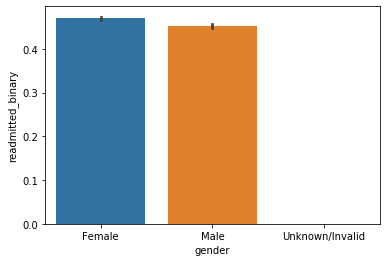

In [32]:
sns.barplot(x= 'gender', y ='readmitted_binary', data = df_cat)

In [33]:
count_table1 = pd.crosstab(df_cat['readmitted_binary'], df_cat['gender'])
count_table1

gender,Female,Male,Unknown/Invalid
readmitted_binary,,,
0,29038,25823,3
1,25670,21232,0


In [34]:
stats.chisquare(count_table1, axis = None)

Power_divergenceResult(statistic=52693.023996226635, pvalue=0.0)

**Conclusion:** Gender has an impact on readmission rates

## Determine Relationship between Insulin and Readmission

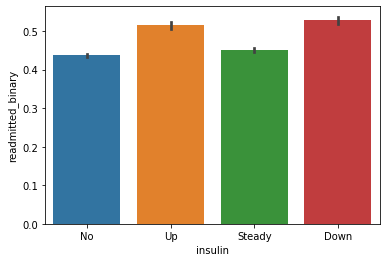

In [35]:
sns.barplot(x= 'insulin', y ='readmitted_binary', data = df_cat)

In [36]:
count_table2 = pd.crosstab(df_cat['readmitted_binary'], df_cat['insulin'])
count_table2

insulin,Down,No,Steady,Up
readmitted_binary,,,,
0,5768,26678,16934,5484
1,6450,20705,13915,5832


In [37]:
stats.chisquare(count_table2, axis = None)

Power_divergenceResult(statistic=36571.68402020321, pvalue=0.0)

## Adding Readmitted Binary into DF2

In [38]:
df2['readmitted_binary'] = df2['readmitted'].apply(lambda x: 0 if x=='NO' else 1)

## Determine Relationship between Time in Hospital and Readmission

(array([31400., 17742., 13915., 17493.,  5859.,  4387.,  5342.,  1852.,
         1447.,  2252.]),
 array([ 1. ,  2.3,  3.6,  4.9,  6.2,  7.5,  8.8, 10.1, 11.4, 12.7, 14. ]),
 <a list of 10 Patch objects>)

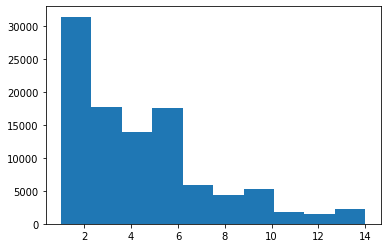

In [39]:
plt.hist(df2['time_in_hospital'])

In [40]:
admitted_time = df2.loc[df2['readmitted_binary']==0, 'time_in_hospital'] 
not_admitted_time = df2.loc[df2['readmitted_binary']==1, 'time_in_hospital']

In [41]:
age_list=df2['age'].unique()

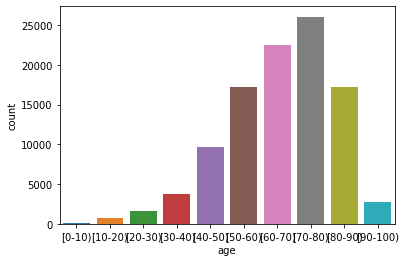

In [42]:
sns.countplot(df2['age'])

In [43]:
age_dic={}
for i in range(len(age_list)):
    age_dic[age_list[i]]=i


df2['age_rank'] = df['age'].map(age_dic)

In [44]:
df2.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_binary,age_rank
0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,41.0,0.0,1.0,...,No,No,No,No,No,No,No,NO,0,0
1,Caucasian,Female,[10-20),1.0,1.0,7.0,3.0,59.0,0.0,18.0,...,No,No,No,No,No,Ch,Yes,>30,1,1
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,2.0,11.0,5.0,13.0,...,No,No,No,No,No,No,Yes,NO,0,2
3,Caucasian,Male,[30-40),1.0,1.0,7.0,2.0,44.0,1.0,16.0,...,No,No,No,No,No,Ch,Yes,NO,0,3
4,Caucasian,Male,[40-50),1.0,1.0,7.0,1.0,51.0,0.0,8.0,...,No,No,No,No,No,Ch,Yes,NO,0,4


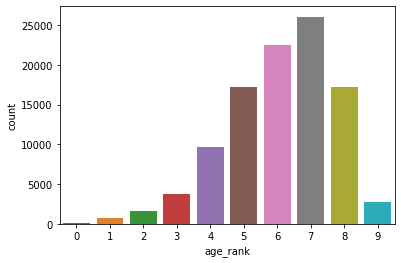

In [45]:
sns.countplot(df2['age_rank'])

In [46]:
df_num = df2.select_dtypes(include='number').copy()

In [47]:
df_num.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted_binary,age_rank
0,6.0,25.0,1.0,1.0,41.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
1,1.0,1.0,7.0,3.0,59.0,0.0,18.0,0.0,0.0,0.0,9.0,1,1
2,1.0,1.0,7.0,2.0,11.0,5.0,13.0,2.0,0.0,1.0,6.0,0,2
3,1.0,1.0,7.0,2.0,44.0,1.0,16.0,0.0,0.0,0.0,7.0,0,3
4,1.0,1.0,7.0,1.0,51.0,0.0,8.0,0.0,0.0,0.0,5.0,0,4


In [48]:
df_num.drop(['admission_type_id','discharge_disposition_id','admission_source_id','readmitted_binary','age_rank'], axis=1, inplace=True);

In [49]:
df_num.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,1.0,41.0,0.0,1.0,0.0,0.0,0.0,1.0
1,3.0,59.0,0.0,18.0,0.0,0.0,0.0,9.0
2,2.0,11.0,5.0,13.0,2.0,0.0,1.0,6.0
3,2.0,44.0,1.0,16.0,0.0,0.0,0.0,7.0
4,1.0,51.0,0.0,8.0,0.0,0.0,0.0,5.0


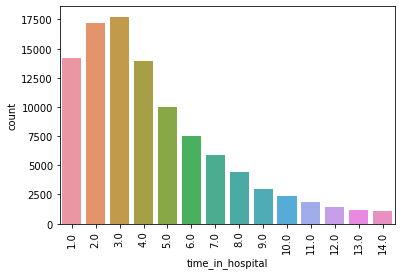

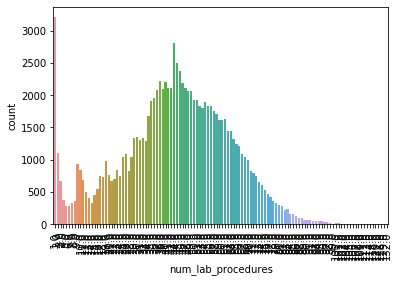

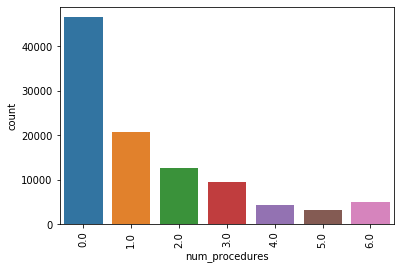

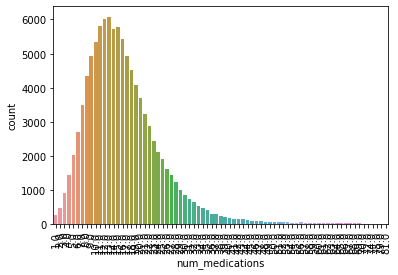

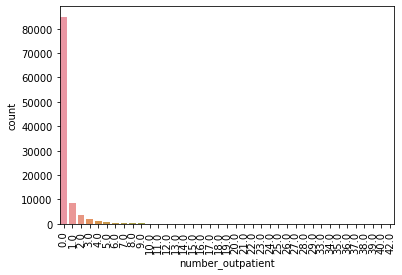

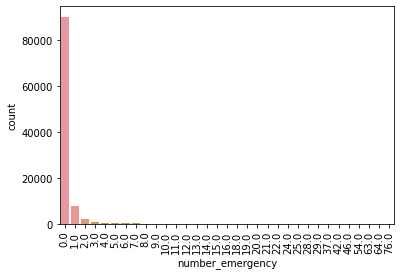

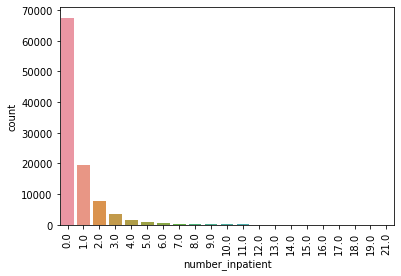

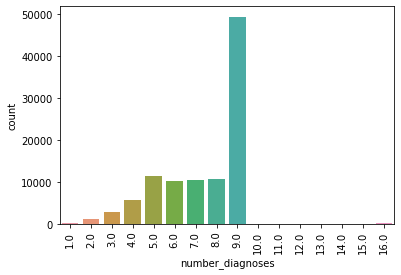

In [50]:
for name in df_num.columns:
    sns.countplot(df_num[name])
    plt.xticks(rotation=90)
    plt.show()
    

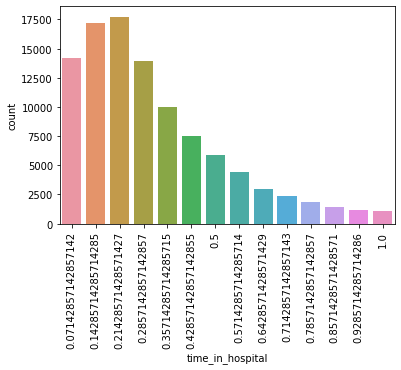

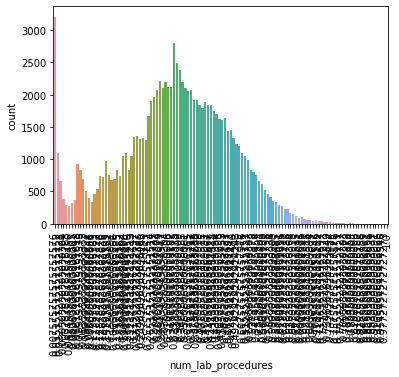

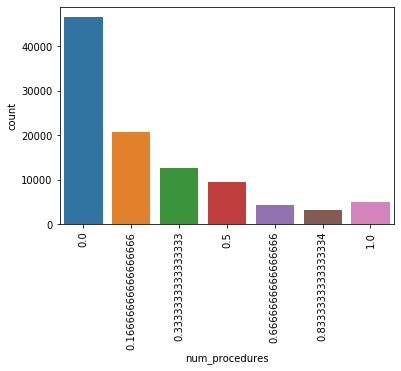

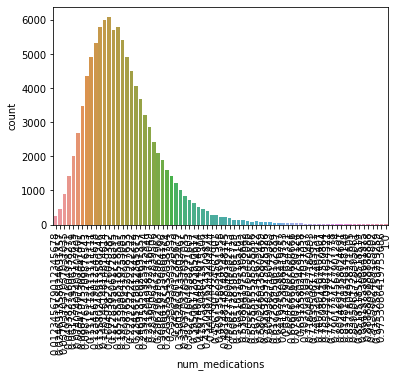

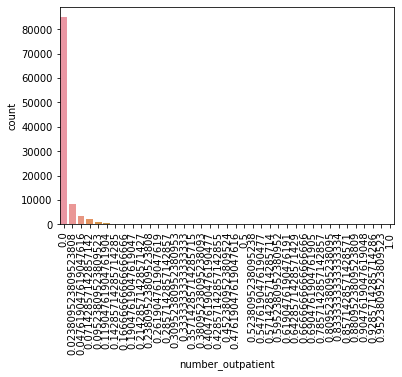

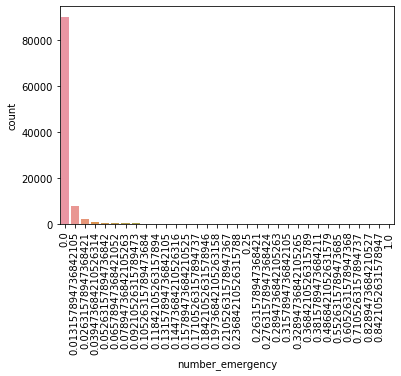

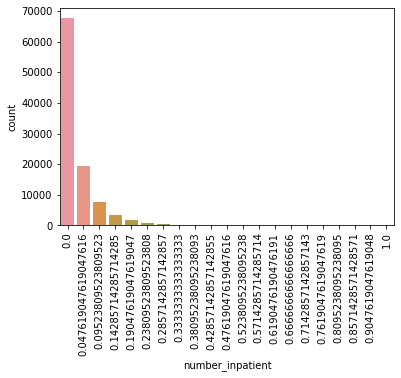

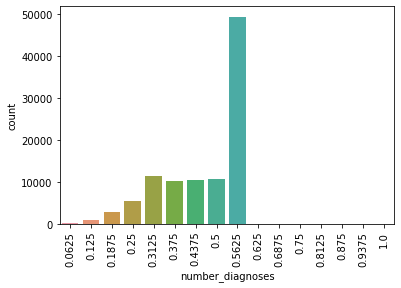

In [51]:
# scale to max
for name in df_num.columns:
    sns.countplot(df_num[name]/df_num[name].max()  )
    plt.xticks(rotation =90)
    plt.show()

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler= StandardScaler()

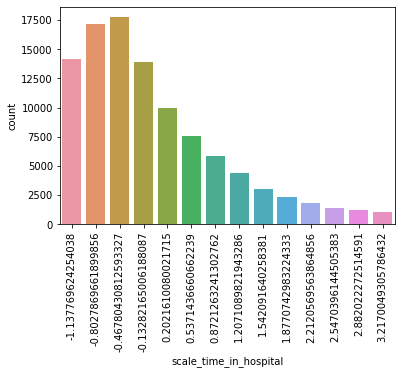

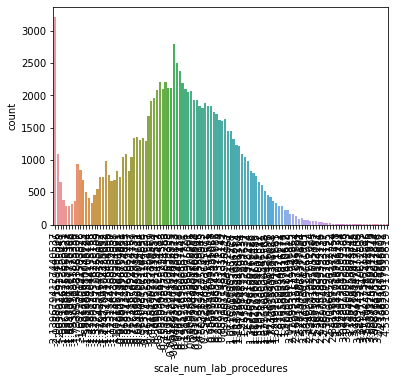

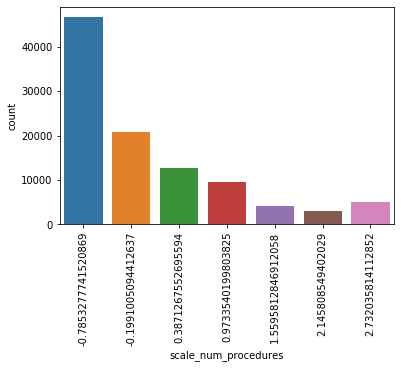

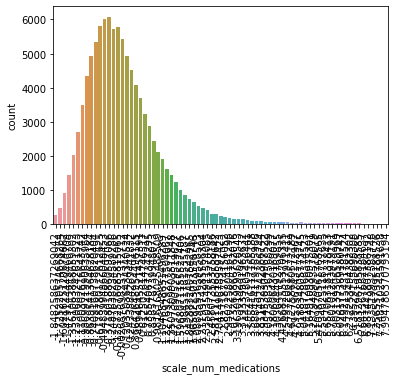

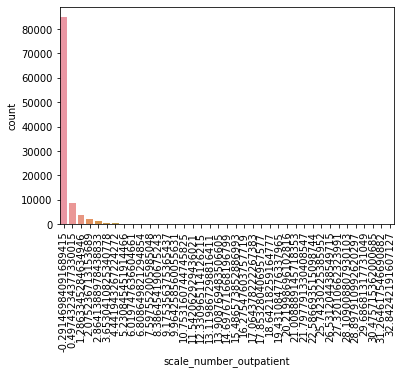

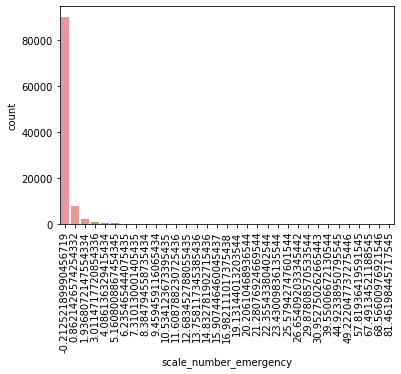

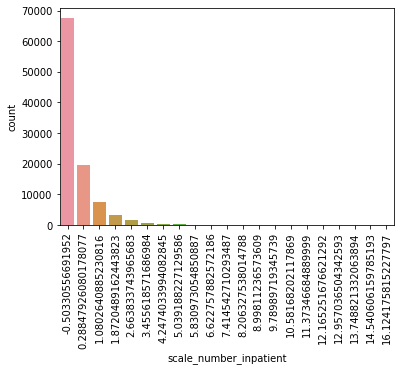

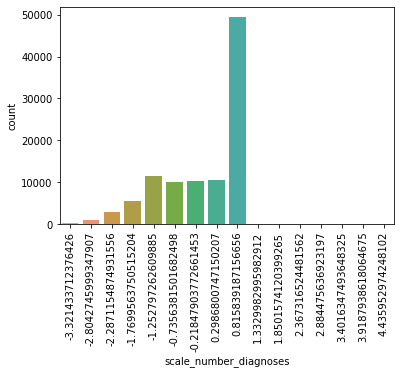

In [54]:
for name in df_num.columns:
    df_num['scale_'+name]=scaler.fit_transform(df_num[[name]])
    sns.countplot(df_num['scale_'+name])
    plt.xticks(rotation =90)
    plt.show()

## Combining two problematic features

Number of diagnoses and age group

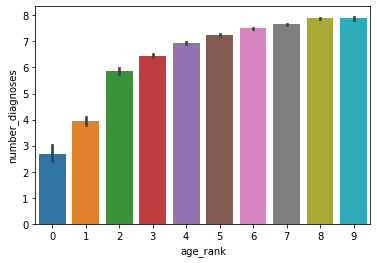

In [55]:
sns.barplot(data = df2, x= 'age_rank', y= 'number_diagnoses')

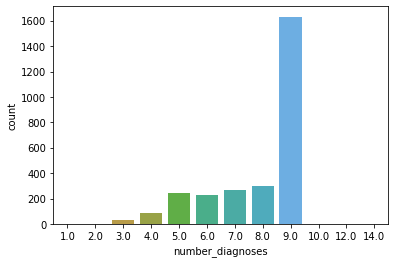

In [56]:
#Frequency of number of diagnoses for age group 9
sns.countplot(df2.loc[df2['age_rank']==9, 'number_diagnoses'])

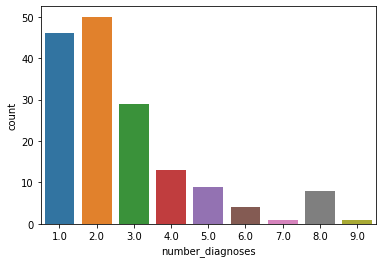

In [57]:
#Frequency of number of diagnoses for age group 0
sns.countplot(df2.loc[df2['age_rank']==0, 'number_diagnoses'])

In [58]:
df2.corr()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted_binary,age_rank
admission_type_id,1.000000,0.083269,0.106633,-0.012496,-0.143655,0.129932,0.079531,0.026377,-0.019168,-0.038132,-0.117202,-0.004922,-0.007205
discharge_disposition_id,0.083269,1.000000,0.018194,0.162813,0.023477,0.015724,0.108716,-0.008725,-0.024343,0.020810,0.046929,-0.014754,0.114361
admission_source_id,0.106633,0.018194,1.000000,-0.006963,0.048931,-0.135461,-0.054631,0.027258,0.059703,0.036298,0.072305,0.039941,0.044667
time_in_hospital,-0.012496,0.162813,-0.006963,1.000000,0.318561,0.191456,0.466091,-0.008901,-0.009467,0.073569,0.220121,0.051286,0.107516
num_lab_procedures,-0.143655,0.023477,0.048931,0.318561,1.000000,0.057949,0.268196,-0.007659,-0.002191,0.039239,0.152820,0.039292,0.020731
num_procedures,0.129932,0.015724,-0.135461,0.191456,0.057949,1.000000,0.385743,-0.024958,-0.038046,-0.066208,0.073598,-0.044799,-0.030051
num_medications,0.079531,0.108716,-0.054631,0.466091,0.268196,0.385743,1.000000,0.045029,0.013183,0.064192,0.261435,0.046772,0.041847
number_outpatient,0.026377,-0.008725,0.027258,-0.008901,-0.007659,-0.024958,0.045029,1.000000,0.091292,0.107188,0.094183,0.082059,0.023758
number_emergency,-0.019168,-0.024343,0.059703,-0.009467,-0.002191,-0.038046,0.013183,0.091292,1.000000,0.266480,0.055572,0.102998,-0.087306
number_inpatient,-0.038132,0.020810,0.036298,0.073569,0.039239,-0.066208,0.064192,0.107188,0.266480,1.000000,0.104767,0.217208,-0.042880


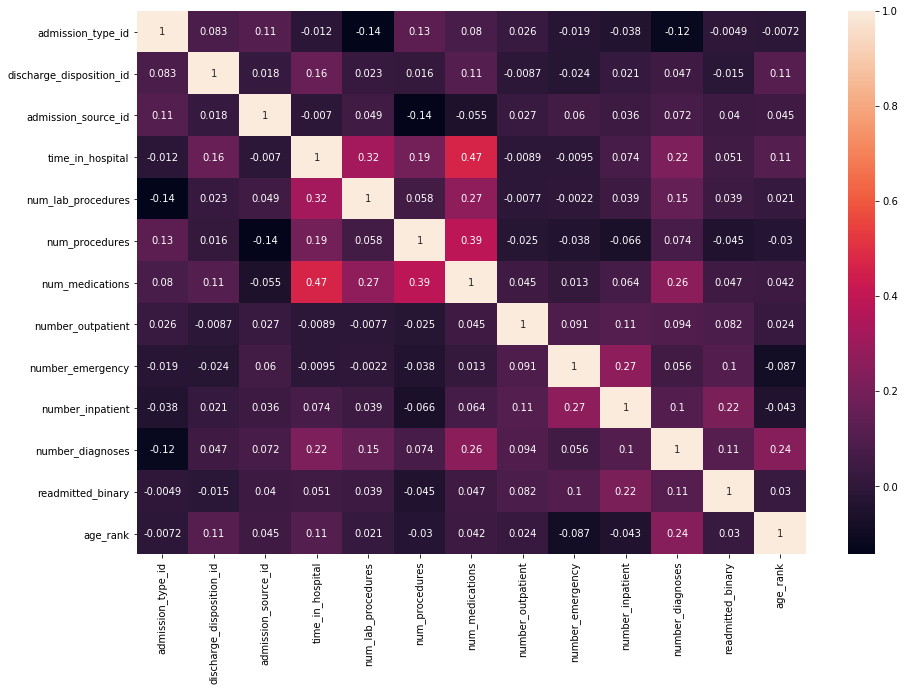

In [59]:
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(),annot=True)

In [60]:
from sklearn.feature_selection import SelectKBest, f_classif

In [61]:
df2.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'readmitted_binary', 'age_rank'],
      dtype='object')

In [62]:
df2 = df2.fillna(0)
Y=df2['readmitted_binary']
X=df2.drop(columns=['race', 'gender', 'age','diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted','readmitted_binary'], axis=1)

In [63]:
k  = 5
kbest = SelectKBest(k=k, score_func= f_classif)
X_best_feature = kbest.fit_transform(X,Y)


In [64]:
X_best_feature = pd.DataFrame(X_best_feature, columns = X.columns[kbest.get_support()])

In [65]:
X_best_feature.columns

Index(['time_in_hospital', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient'],
      dtype='object')

In [66]:
X_best_feature.head()

,time_in_hospital,num_medications,number_outpatient,number_emergency,number_inpatient
0,1.0,1.0,0.0,0.0,0.0
1,3.0,18.0,0.0,0.0,0.0
2,2.0,13.0,2.0,0.0,1.0
3,2.0,16.0,0.0,0.0,0.0
4,1.0,8.0,0.0,0.0,0.0


In [67]:
kbest.scores_

array([2.44800085e+00, 2.21254377e+01, 1.62036252e+02, 2.67573382e+02,
       1.56448854e+02, 2.04623588e+02, 2.23272840e+02, 6.89429409e+02,
       1.09057739e+03, 5.03770552e+03, 9.41519557e+01])

In [68]:
pd.Series(kbest.scores_, index=X.columns)

admission_type_id              2.448001
discharge_disposition_id      22.125438
admission_source_id          162.036252
time_in_hospital             267.573382
num_lab_procedures           156.448854
num_procedures               204.623588
num_medications              223.272840
number_outpatient            689.429409
number_emergency            1090.577388
number_inpatient            5037.705523
age_rank                      94.151956
dtype: float64

In [69]:
from sklearn.decomposition import PCA

In [70]:
pca = PCA(n_components =11)
X_pca =pca.fit_transform(X)
cov = np.cov(X_pca.T)

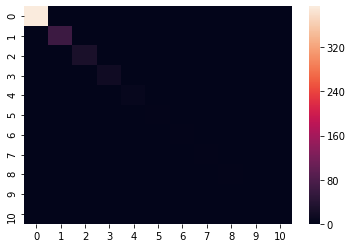

In [71]:
sns.heatmap(cov)

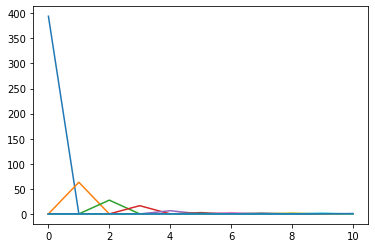

In [72]:
plt.plot(cov);

## Model performance
* Go back to your diabetes data set, and create a logistic regression model

* Evaluate your model, using cross validation and train-test splitting

* Use each of the metrics we went over

* Create a confusion matrix and an ROC curve

* Vary your hyperparameters and see the results on your metrics


In [73]:
# all imports in one place for convenience
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups_vectorized
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
%matplotlib inline

In [74]:
df2.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_binary,age_rank
0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,41.0,0.0,1.0,...,No,No,No,No,No,No,No,NO,0,0
1,Caucasian,Female,[10-20),1.0,1.0,7.0,3.0,59.0,0.0,18.0,...,No,No,No,No,No,Ch,Yes,>30,1,1
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,2.0,11.0,5.0,13.0,...,No,No,No,No,No,No,Yes,NO,0,2
3,Caucasian,Male,[30-40),1.0,1.0,7.0,2.0,44.0,1.0,16.0,...,No,No,No,No,No,Ch,Yes,NO,0,3
4,Caucasian,Male,[40-50),1.0,1.0,7.0,1.0,51.0,0.0,8.0,...,No,No,No,No,No,Ch,Yes,NO,0,4


In [87]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']


In [122]:
y = df2['readmitted_binary']
X=df2
X.drop(['readmitted_binary','admission_type_id','discharge_disposition_id','admission_source_id'],axis=1)
X= X.select_dtypes(include=numerics)
X1 = df2[X_best_feature.columns]

In [123]:
X_train, X_test, y_train, y_test  =  train_test_split(X1, y, random_state = 1)

In [124]:
lr = LogisticRegression(solver='sag', penalty = 'l2')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)


0.6164216649634463

In [125]:
X_train.shape, y_test.shape

((76324, 5), (25442,))

In [126]:
predictions = lr.predict(X_test)

confusion = confusion_matrix(y_test, predictions, labels=[1, 0])
print(confusion)

[[ 4012  7604]
 [ 2155 11671]]


In [128]:
df2['glimepiride-pioglitazone'].unique()

array(['No', 'Steady'], dtype=object)